# LIGHT-1 Analysis Workshop

Please help us fix the timestamp! This is your viewing python notebook. 

Here you can examine your logfile section for errors. When you are done please run the following on a clear cell to submit and uplpoad your corrections.
```Python
rp.log_submit()
```

THANK YOU ~~AND HAVE FUN~~!


In [1]:
# Importing some libraries
import raadpy as rp

#####################
## SET YOUR NUMBER ##
#####################
NUMBER = 8

# Download the logfile
rp.get_log_by_number(NUMBER)

# Load the data filenames
raw_dir = './'
filenames = rp.get_filenames(raw_dir)
print(filenames)

# To have interactive plots in the jupyter notebook
# %matplotlib widget

Warning! Cupy not found! GPU accelleration is not available

You have already downloaded this file! Delete it and run again if you want to replace it!
{'log': 'RAAD-8-log.txt'}


In [2]:
# Now we load the log file and find it's timestamps
log     = rp.log_expand(filename=raw_dir+filenames['log'])      # Load the logfile
log     = rp.log_with_timestamp(log,reorder=False)              # Find the timestamp that each command finished executing

Found weird command
 {'command': 'SE0>rtc read\n', 'output': ['curr rtc time 16657438script delayuntil 1665756900\n', 'OK\n'], 'index': 10212}
Found weird command
 {'command': 'SE0>script delay 18script delayuntil 1666075500\n', 'output': ['OK\n'], 'index': 18393}


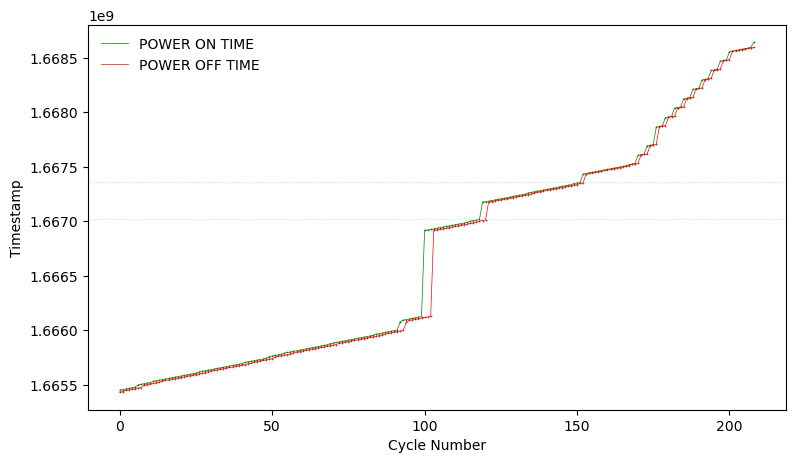

In [3]:
# Collect the timestamps for when an orbit started and ended
start_timestamps_log    = rp.collect_time_cmd(log,rp.PWR_ON_CMD)
end_timestamps_log      = rp.collect_time_cmd(log,rp.PWR_OFF_CMD)

# Match the two arrays from the back
end_timestamps_log, start_timestamps_log = rp.match(end_timestamps_log,start_timestamps_log)

# Get the unmatched cycles
# Goes from the end of the file, and if it sees a start without first seeing an end it records that entry.
UNMATCHED = rp.get_unmatched_cycles(log)

# Plot these
rp.plot_timestamps_log(start_timestamps_log,end_timestamps_log,UNMATCHED);

In [4]:
UNMATCHED[0]

{'command': 'SE0>csp txrx 4 14 600 0007010100\n',
 'output': ['Answer: 0000\n',
  'Bytes: 2\n',
  'Flags: 0x00 (frag=0, HMAC=0, XTEA=0, RDP=0, CRC32=0)\n',
  'OK\n'],
 'index': 30512,
 'timestamp': 1667358000.014465}

In [34]:
print(rp.parse_command(log[2]['command']))

In [6]:
######################
## SUBMIT WHEN DONE ##
######################

# rp.log_submit(NUMBER)